# Classwork 4

| Item | Information |
| ------ | ------ |
| Student | Krystian Ojeda Confeiteiro |
| Professor | Dr. Sam |
| Course | MA 305 - 06DB|
| Assignment | Classword 4 ([link](https://erau.instructure.com/courses/163847/assignments/3258600)) |
| Date Due: | 10/20/2023 |
| Current Date: | 10/20/2023 |

## Assignment Outline


Plot the function(s) $f_n(x)=x^n\sin x$, for $n=(1,\space 2,\space 3,\space 4)$ on $1000$ points across the range $-20\leq x\leq 20$. To make the graphs easier to compare, scale the function values to a maximum of $1$ (i.e., *normalize them*) in the region considered. Appropriatly lable the axes and give a legened and a title. Use four colors, `"r", "b", "g", "k"`, `linestyle="-"` (solid), and `linewidth=2`. Save the figure as a `.pdf` file with filename `cw4.pdf` and submit it **through Canvas**.

For our four values of $n$, our equations will be:

\begin{gather}\begin{cases}
    f_1(x)=x^1\sin(x) \\
    f_2(x)=x^2\sin(x) \\
    f_3(x)=x^3\sin(x) \\
    f_4(x)=x^4\sin(x)
\end{cases}\end{gather}

Which leaves

\begin{gather}\boxed{
    f_1(x)=x\sin(x) \\
    f_2(x)=x^2\sin(x) \\
    f_3(x)=x^3\sin(x) \\
    f_4(x)=x^4\sin(x),
}\end{gather}

which will be plotted by the `plot_funk()` [function](https://colab.research.google.com/drive/15txgpuOEFY5MW9tIWSuVDRw1BWyX6mO6#scrollTo=otg2iqwiJe_M&line=40&uniqifier=1).

# *The* Code

Figure saved as `cw4_plot.pdf`


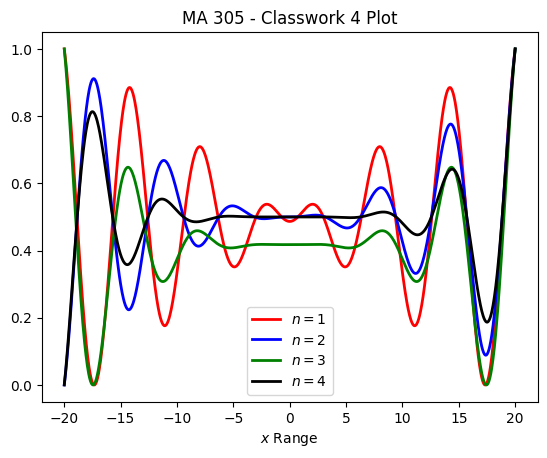

In [28]:
#!/usr/bin/env python3
"""
Krystian Confeiteiro
Dr. Sam
MA 305 - 06DB
Classwork 4
10/20/2023
"""

import matplotlib.pyplot as plt
import numpy as np

from math import sin

# function for combining stuff
combine = lambda *seconds, first: [(first, second) for second in seconds]

# define helper function for mapping functions to a list
def _map(func, *lists):
    return list(map(func, *lists))


# define equation to normalize the values
def normalize(_list):
    shift = lambda value: value + abs(min(_list))
    max_divide = lambda value: value / max(_list)
    if min(_list) < 0:
        _list = _map(shift, _list)

    return _map(max_divide, _list)

# define function for the f(x) =
def function(xrange, nth):
    f_n = lambda _x: (_x**nth)*sin(_x)
    x_vals = np.linspace(*x_range, num=1000)
    return normalize(_map(f_n, x_vals)), x_vals


# define function to plot everything (w/ customization)
def plot_funk(
    data_arrays,
    labels,
    styles,
    widths,
    colors,
    title=None,
    xlabel=None,
    show=False,
    save_as=None,
    **kwargs
):
    fig, axes = plt.subplots(**kwargs)
    for data, label, style, width, color in zip(data_arrays, labels, styles, widths, colors):
        axes.plot(*data, label=label, linewidth=width, linestyle=style, color=color)

    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.legend()

    if show:
        plt.show()

    if save_as:
        fig.savefig(save_as)
        print("Figure saved as `{}`".format(save_as.split("/")[-1]))


x_range = (-20, 20)
f_1, _ = function(x_range, 1)
f_2, _ = function(x_range, 2)
f_3, _ = function(x_range, 3)
f_4, xvals = function(x_range, 4)

PLT_CFG = {
    "datasets": combine(f_1, f_2, f_3, f_4, first=xvals),
    "labels": [r"$n=1$", r"$n=2$", r"$n=3$", r"$n=4$"],
    "styles": ["-"]*len(f_1),
    "widths": [2]*len(f_1),
    "colors": ["r", "b", "g", "k"],
    "title": r"MA 305 - Classwork 4 Plot",
    "xlabel": r"$x$ Range",
}

save_as = "/content/drive/MyDrive/006_Courses/MA_305/001_Classwork/CW4/cw4_plot.pdf"
plot_funk(*PLT_CFG.values(), save_as=save_as)
